In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import sklearn
import statsmodels
from warnings import filterwarnings
filterwarnings("ignore")

In [93]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Sklearn version:',sklearn.__version__)
print('Statsmodels version:',statsmodels.__version__)

Numpy version: 1.21.5
Pandas version: 1.4.2
Seaborn version: 0.11.2
Matplotlib version: 3.5.1
Sklearn version: 1.0.2
Statsmodels version: 0.13.2


In [94]:

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

**1. read the data as time series data and plot the data**


In [95]:
df=pd.read_csv('Shoe-Sales.csv',parse_dates=True, squeeze=True,index_col=0)

In [96]:
df.head()

YearMonth
1980-01-01     85
1980-02-01     89
1980-03-01    109
1980-04-01     95
1980-05-01     91
Name: Shoe_Sales, dtype: int64

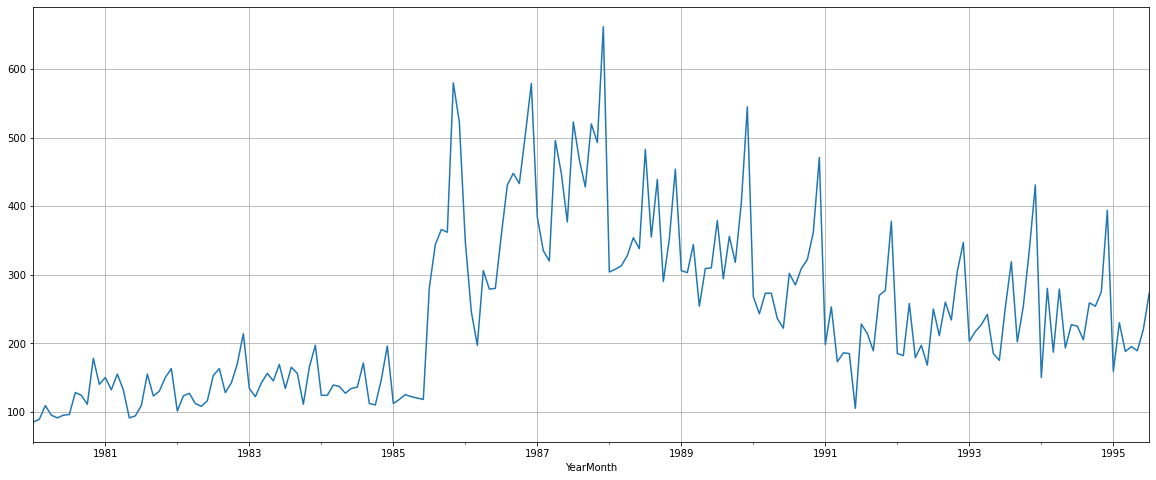

In [97]:
df.plot()
plt.grid()

method2


In [98]:
df_2 = pd.read_csv('Shoe-Sales.csv')

In [99]:
df_2.head()

,YearMonth,Shoe_Sales
0,1980-01,85
1,1980-02,89
2,1980-03,109
3,1980-04,95
4,1980-05,91


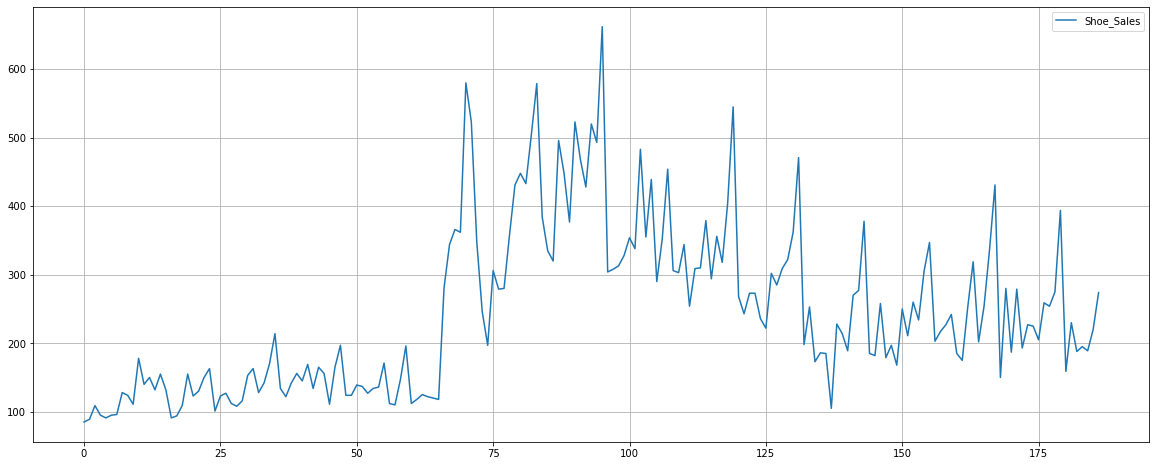

In [100]:
df_2.plot();
plt.grid()


In [101]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [102]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df_2.head()

,YearMonth,Shoe_Sales,Time_Stamp
0,1980-01,85,1980-01-31
1,1980-02,89,1980-02-29
2,1980-03,109,1980-03-31
3,1980-04,95,1980-04-30
4,1980-05,91,1980-05-31


In [103]:
df.describe()

count    187.000000
mean     245.636364
std      121.390804
min       85.000000
25%      143.500000
50%      220.000000
75%      315.500000
max      662.000000
Name: Shoe_Sales, dtype: float64

In [104]:
df_2.describe()

,Shoe_Sales
count,187.000000
mean,245.636364
std,121.390804
min,85.000000
25%,143.500000
50%,220.000000
75%,315.500000
max,662.000000


get all the observations for all the months of 1980

In [105]:
df['1980']

YearMonth
1980-01-01     85
1980-02-01     89
1980-03-01    109
1980-04-01     95
1980-05-01     91
1980-06-01     95
1980-07-01     96
1980-08-01    128
1980-09-01    124
1980-10-01    111
1980-11-01    178
1980-12-01    140
Name: Shoe_Sales, dtype: int64

plot a year on year boxplot for sparkling producction

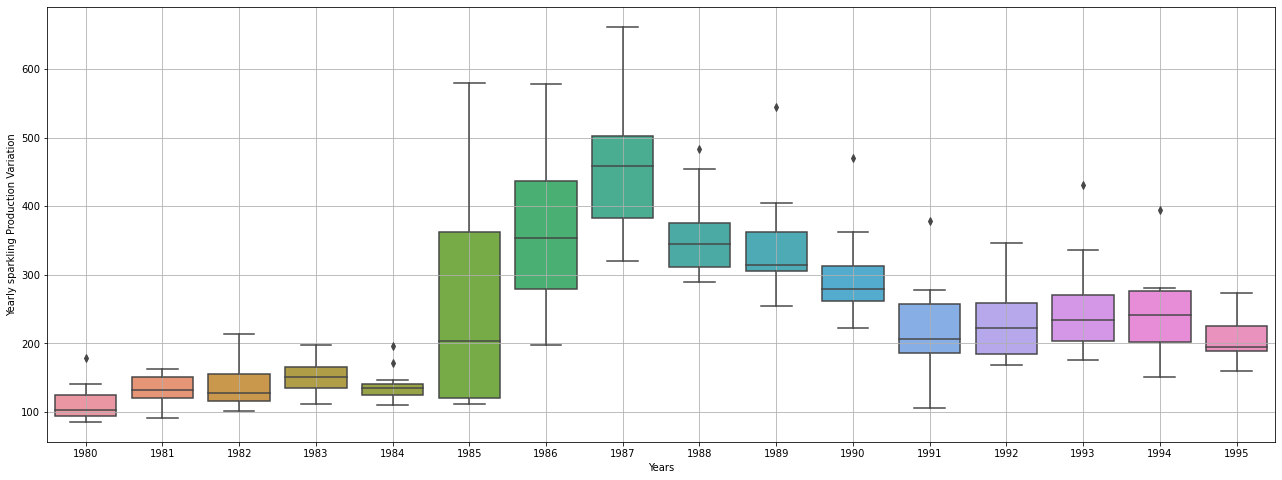

In [106]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.year, y=df.values[0:,], ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly sparkling Production Variation');

Plot a monthly boxplot for the sparkling production taking all the years into account.

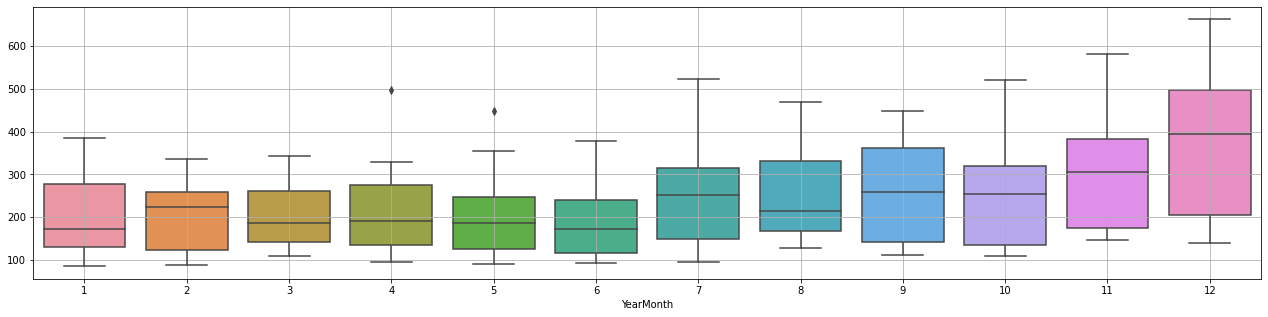

In [107]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(x=df.index.month, y=df.values[0:,], ax=ax,whis=1.5)
plt.grid();

In [108]:
# Plot the Time Series according to different months for different years.

In [109]:
df_2.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df_2.head()

,YearMonth,Shoe_Sales
Time_Stamp,,
1980-01-31,1980-01,85
1980-02-29,1980-02,89
1980-03-31,1980-03,109
1980-04-30,1980-04,95
1980-05-31,1980-05,91


In [110]:
df_2.drop(labels='YearMonth',inplace=True,axis=1)
df_2.head()

,Shoe_Sales
Time_Stamp,
1980-01-31,85
1980-02-29,89
1980-03-31,109
1980-04-30,95
1980-05-31,91


In [111]:
df_2['Shoe_Sales']

Time_Stamp
1980-01-31     85
1980-02-29     89
1980-03-31    109
1980-04-30     95
1980-05-31     91
             ... 
1995-03-31    188
1995-04-30    195
1995-05-31    189
1995-06-30    220
1995-07-31    274
Name: Shoe_Sales, Length: 187, dtype: int64

In [112]:
yearly_sales_across_months = pd.pivot_table(df_2, values = 'Shoe_Sales', columns = df_2.index.month, 
                                        index = df_2.index.year)

yearly_sales_across_months

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,85.0,89.0,109.0,95.0,91.0,95.0,96.0,128.0,124.0,111.0,178.0,140.0
1981,150.0,132.0,155.0,132.0,91.0,94.0,109.0,155.0,123.0,130.0,150.0,163.0
1982,101.0,123.0,127.0,112.0,108.0,116.0,153.0,163.0,128.0,142.0,170.0,214.0
1983,134.0,122.0,142.0,156.0,145.0,169.0,134.0,165.0,156.0,111.0,165.0,197.0
1984,124.0,124.0,139.0,137.0,127.0,134.0,136.0,171.0,112.0,110.0,147.0,196.0
1985,112.0,118.0,125.0,122.0,120.0,118.0,281.0,344.0,366.0,362.0,580.0,523.0
1986,348.0,246.0,197.0,306.0,279.0,280.0,358.0,431.0,448.0,433.0,504.0,579.0
1987,384.0,335.0,320.0,496.0,448.0,377.0,523.0,468.0,428.0,520.0,493.0,662.0
1988,304.0,308.0,313.0,328.0,354.0,338.0,483.0,355.0,439.0,290.0,352.0,454.0


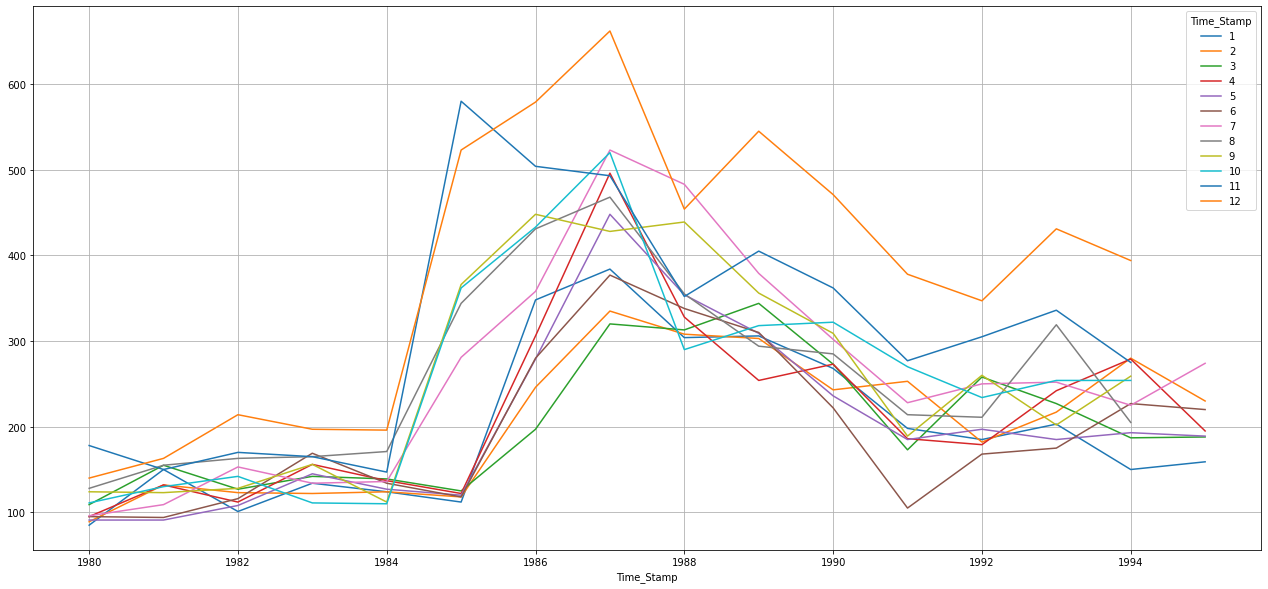

In [113]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

**Read this monthly data into a quarterly and yearly format. Compare the Time Series plot and draw inferences.**

In [114]:
#yearly plot
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.head()

YearMonth
1980-12-31    1341
1981-12-31    1584
1982-12-31    1657
1983-12-31    1796
1984-12-31    1657
Freq: A-DEC, Name: Shoe_Sales, dtype: int64

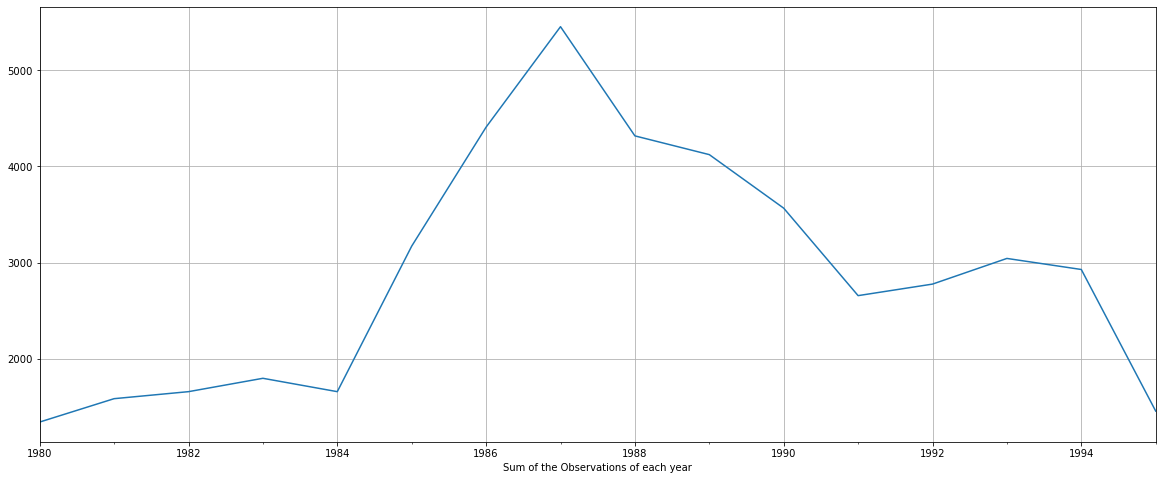

In [115]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [116]:
df_yearly_mean = df.resample('Y').mean()
df_yearly_mean.head()

YearMonth
1980-12-31    111.750000
1981-12-31    132.000000
1982-12-31    138.083333
1983-12-31    149.666667
1984-12-31    138.083333
Freq: A-DEC, Name: Shoe_Sales, dtype: float64

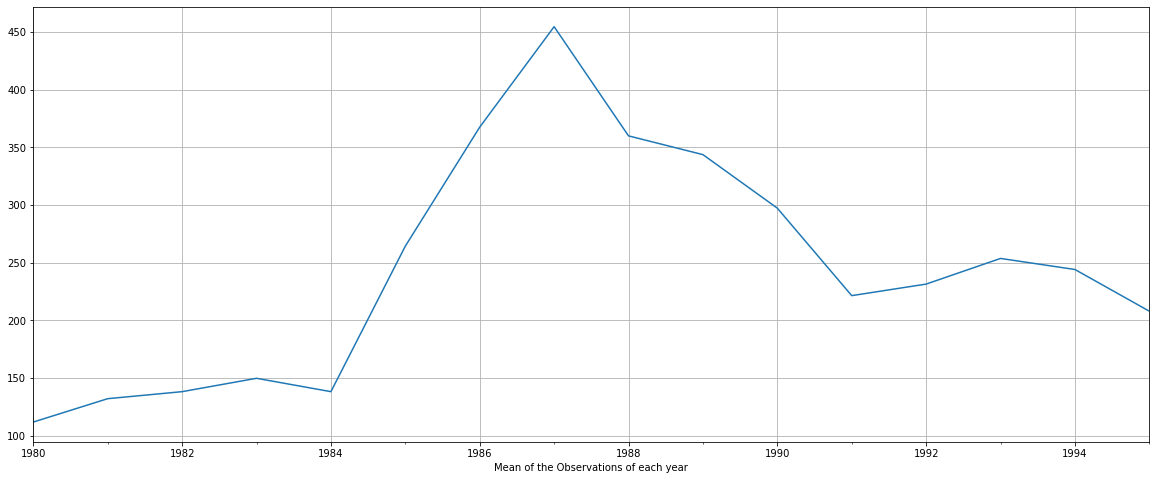

In [117]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

In [118]:
#quarterly plot
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head()

YearMonth
1980-03-31    283
1980-06-30    281
1980-09-30    348
1980-12-31    429
1981-03-31    437
Freq: Q-DEC, Name: Shoe_Sales, dtype: int64

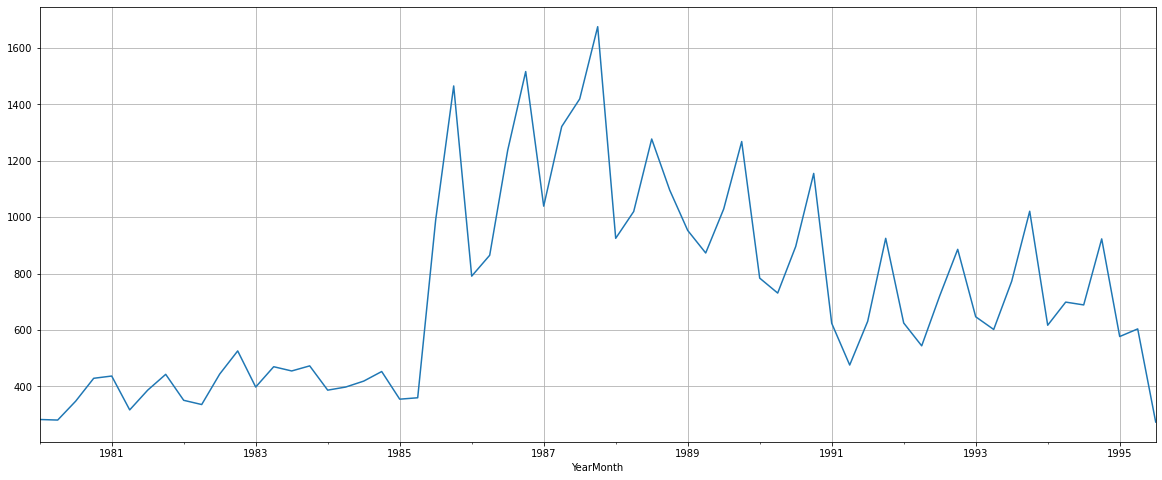

In [119]:
df_quarterly_sum.plot();
plt.grid()

In [120]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.head()

YearMonth
1980-03-31     94.333333
1980-06-30     93.666667
1980-09-30    116.000000
1980-12-31    143.000000
1981-03-31    145.666667
Freq: Q-DEC, Name: Shoe_Sales, dtype: float64

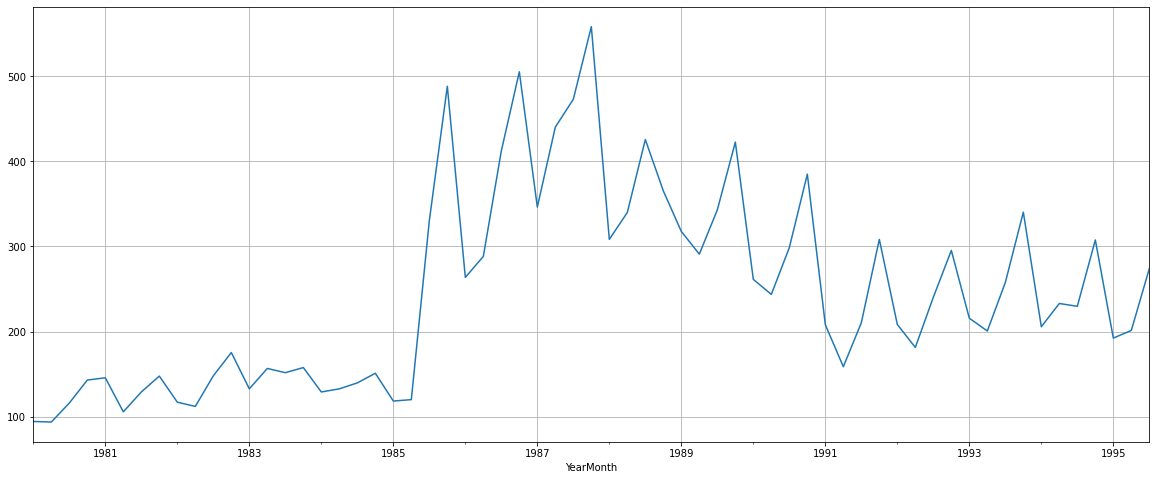

In [121]:
df_quarterly_mean.plot();
plt.grid()

**Decompose the Time Series**

In [122]:
from statsmodels.tsa.seasonal import seasonal_decompose

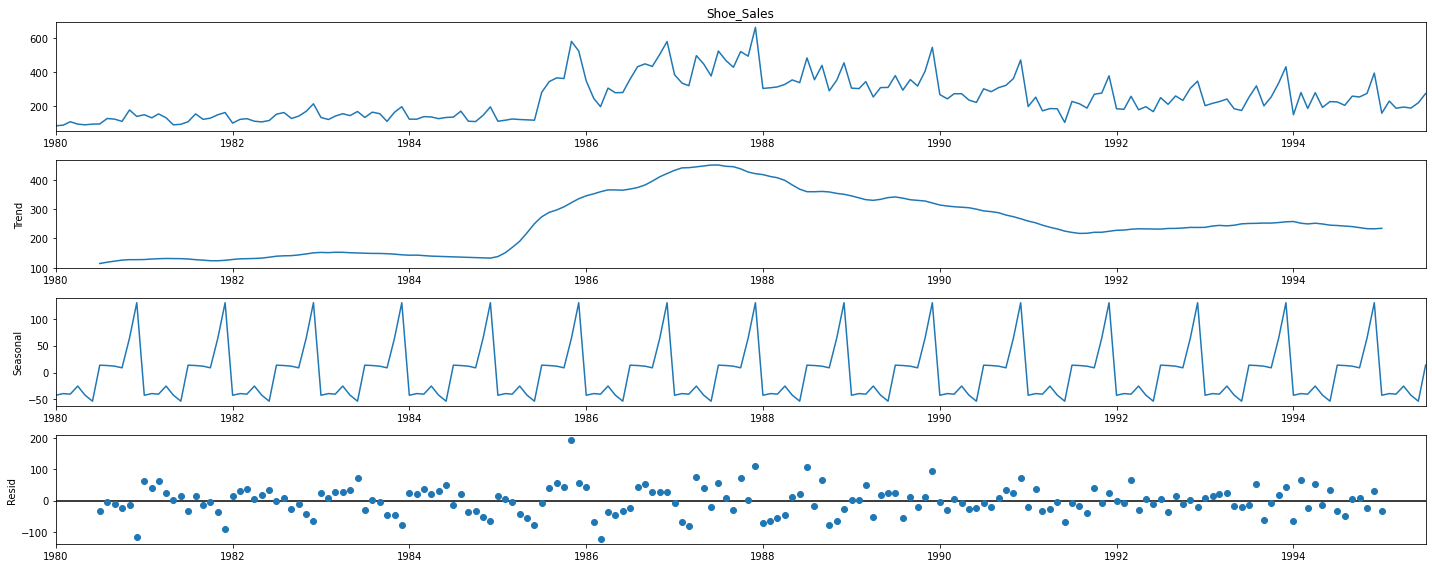

In [123]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

In [124]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [125]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    114.458333
1980-08-01    118.958333
1980-09-01    122.666667
1980-10-01    126.125000
1980-11-01    127.666667
1980-12-01    127.625000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -42.175463
1980-02-01    -39.062566
1980-03-01    -40.122090
1980-04-01    -25.092328
1980-05-01    -41.878042
1980-06-01    -53.208399
1980-07-01     13.741204
1980-08-01     13.077315
1980-09-01     11.866204
1980-10-01      8.835648
1980-11-01     64.152315
1980-12-01    129.866204
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    -32.199537
1980-08-01     -4.035648
1980-09-01    -10.532870
1980-10-01    -23.960648
1980-11-01    -13.818981

In [126]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     82.258796
1980-08-01    114.922685
1980-09-01    112.133796
1980-10-01    102.164352
1980-11-01    113.847685
1980-12-01     10.133796
dtype: float64

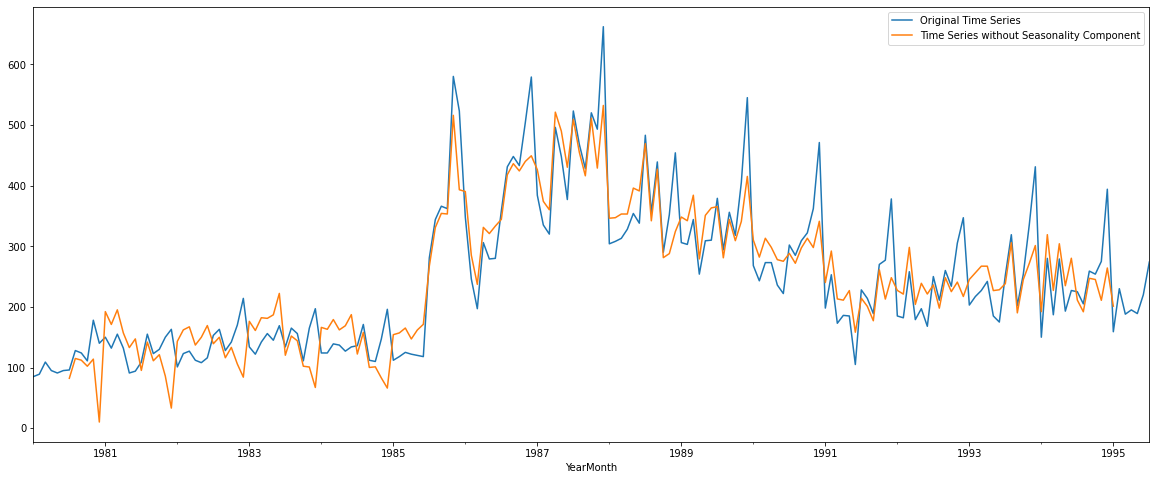

In [127]:
df.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

**multiplicative model**

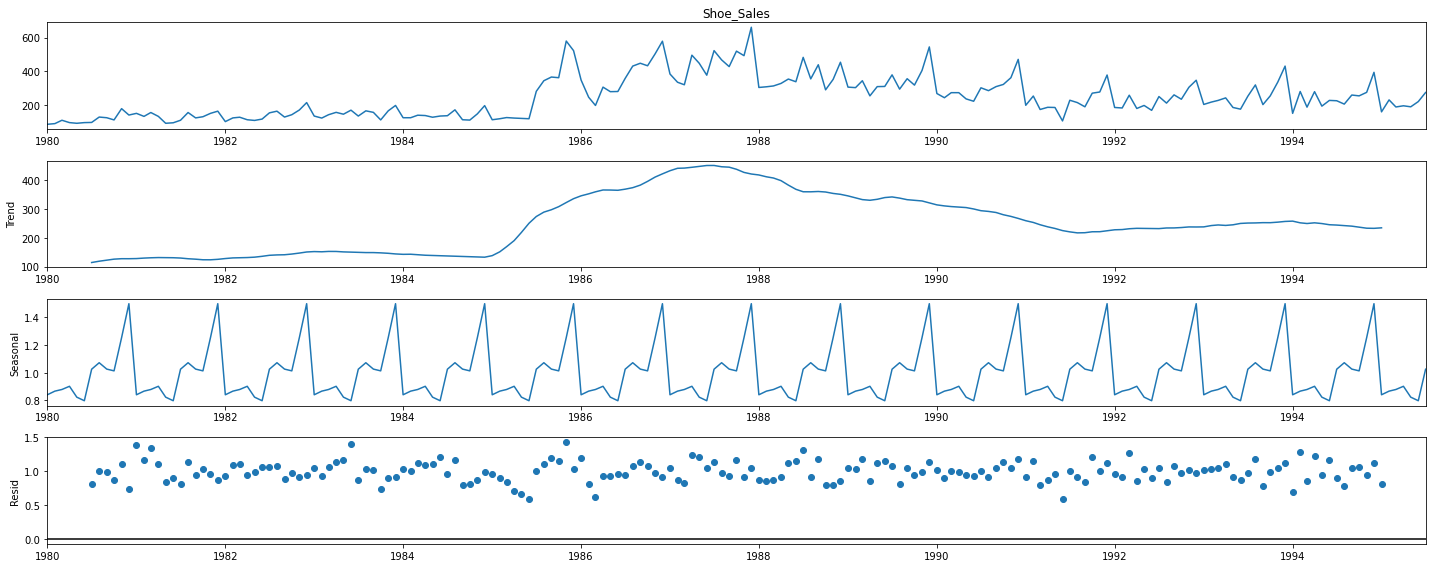

In [128]:
decomposition1 = seasonal_decompose(df,model='multiplicative')
decomposition1.plot();

In [129]:
trend = decomposition1.trend
seasonality = decomposition1.seasonal
residual = decomposition1.resid

In [130]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    114.458333
1980-08-01    118.958333
1980-09-01    122.666667
1980-10-01    126.125000
1980-11-01    127.666667
1980-12-01    127.625000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.840405
1980-02-01    0.866682
1980-03-01    0.878675
1980-04-01    0.901826
1980-05-01    0.823141
1980-06-01    0.797254
1980-07-01    1.025527
1980-08-01    1.072445
1980-09-01    1.026307
1980-10-01    1.013557
1980-11-01    1.254223
1980-12-01    1.499958
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.817856
1980-08-01    1.003322
1980-09-01    0.984958
1980-10-01    0.868308
1980-11-01    1.111649
1980-12-01    0.731330
Name: resid, dtype: fl

**Split the data into training and test. The test data should start in 1991.**

In [131]:
train = df_2[df.index<'1991'] 
test  = df_2[df.index>='1991']

In [132]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [133]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Shoe_Sales
Time_Stamp            
1980-01-31          85
1980-02-29          89
1980-03-31         109
1980-04-30          95
1980-05-31          91 

Last few rows of Training Data 
             Shoe_Sales
Time_Stamp            
1990-08-31         285
1990-09-30         309
1990-10-31         322
1990-11-30         362
1990-12-31         471 

First few rows of Test Data 
             Shoe_Sales
Time_Stamp            
1991-01-31         198
1991-02-28         253
1991-03-31         173
1991-04-30         186
1991-05-31         185 

Last few rows of Test Data 
             Shoe_Sales
Time_Stamp            
1995-03-31         188
1995-04-30         195
1995-05-31         189
1995-06-30         220
1995-07-31         274 



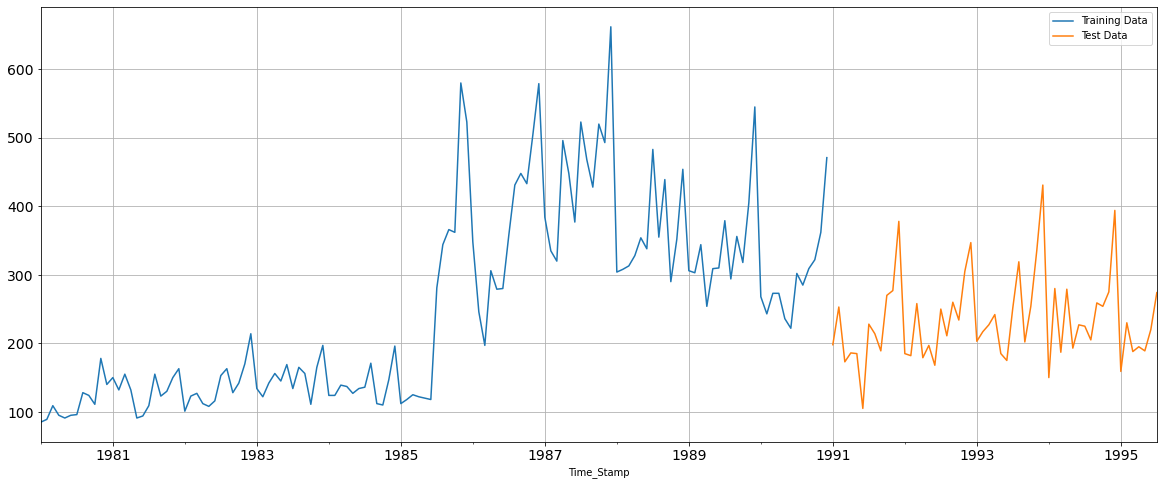

In [134]:
train['Shoe_Sales'].plot(fontsize=14)
test['Shoe_Sales'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

**Building different models and comparing the accuracy metrics.**

**1. linear regression**

In [135]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [136]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [137]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Shoe_Sales  time
Time_Stamp                  
1980-01-31          85     1
1980-02-29          89     2
1980-03-31         109     3
1980-04-30          95     4
1980-05-31          91     5 

Last few rows of Training Data 
             Shoe_Sales  time
Time_Stamp                  
1990-08-31         285   128
1990-09-30         309   129
1990-10-31         322   130
1990-11-30         362   131
1990-12-31         471   132 

First few rows of Test Data 
             Shoe_Sales  time
Time_Stamp                  
1991-01-31         198   133
1991-02-28         253   134
1991-03-31         173   135
1991-04-30         186   136
1991-05-31         185   137 

Last few rows of Test Data 
             Shoe_Sales  time
Time_Stamp                  
1995-03-31         188   183
1995-04-30         195   184
1995-05-31         189   185
1995-06-30         220   186
1995-07-31         274   187 



In [138]:
from sklearn.linear_model import LinearRegression

In [139]:
lr = LinearRegression()

In [140]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Shoe_Sales'].values)


LinearRegression()

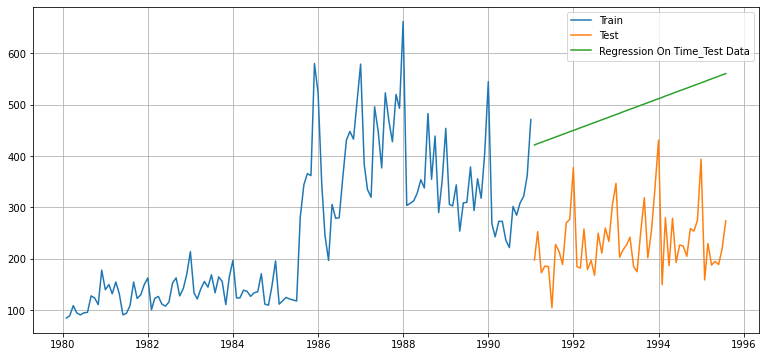

In [141]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [142]:
from sklearn import metrics

**model evaluation**

In [143]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Shoe_Sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 266.276


In [144]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,266.276472


**Model 2: Naive Approach: y^t+1=yt**


In [145]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [146]:
NaiveModel_test['naive'] = np.asarray(train['Shoe_Sales'])[len(np.asarray(train['Shoe_Sales']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    471
1991-02-28    471
1991-03-31    471
1991-04-30    471
1991-05-31    471
Name: naive, dtype: int64

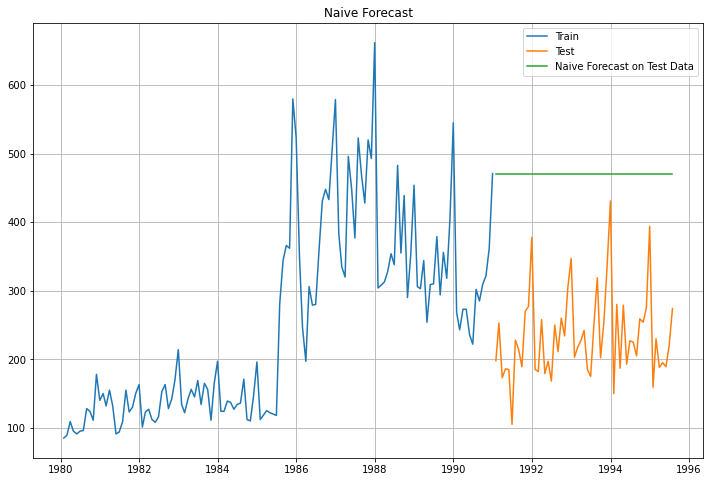

In [147]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

**model evaluation**

In [148]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Shoe_Sales'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 245.121


In [149]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,266.276472
NaiveModel,245.121306


**Method 3: Simple Average**

In [150]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [151]:
SimpleAverage_test['mean_forecast'] = train['Shoe_Sales'].mean()
SimpleAverage_test.head()

,Shoe_Sales,mean_forecast
Time_Stamp,,
1991-01-31,198,250.575758
1991-02-28,253,250.575758
1991-03-31,173,250.575758
1991-04-30,186,250.575758
1991-05-31,185,250.575758


Text(0.5, 1.0, 'Simple Average Forecast')

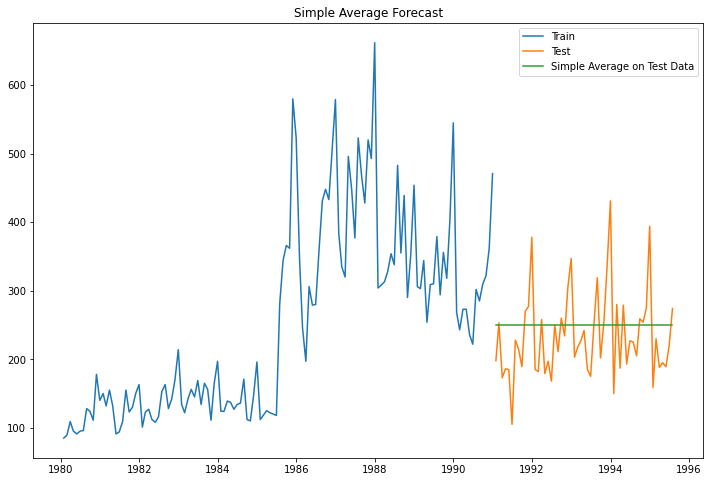

In [152]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Shoe_Sales'], label='Train')
plt.plot(SimpleAverage_test['Shoe_Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")

**model evaluation**

In [153]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Shoe_Sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 63.985


In [154]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570


**method 4: simple exponential method**

In [155]:
# Importing the necessary packages

import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

In [156]:
train             = df[df.index<'1991'] 
test              = df[df.index>='1991']

In [157]:
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


YearMonth
1980-01-01     85
1980-02-01     89
1980-03-01    109
1980-04-01     95
1980-05-01     91
             ... 
1990-08-01    285
1990-09-01    309
1990-10-01    322
1990-11-01    362
1990-12-01    471
Name: Shoe_Sales, Length: 132, dtype: int64

Test Data


YearMonth
1991-01-01    198
1991-02-01    253
1991-03-01    173
1991-04-01    186
1991-05-01    185
1991-06-01    105
1991-07-01    228
1991-08-01    214
1991-09-01    189
1991-10-01    270
1991-11-01    277
1991-12-01    378
1992-01-01    185
1992-02-01    182
1992-03-01    258
1992-04-01    179
1992-05-01    197
1992-06-01    168
1992-07-01    250
1992-08-01    211
1992-09-01    260
1992-10-01    234
1992-11-01    305
1992-12-01    347
1993-01-01    203
1993-02-01    217
1993-03-01    227
1993-04-01    242
1993-05-01    185
1993-06-01    175
1993-07-01    252
1993-08-01    319
1993-09-01    202
1993-10-01    254
1993-11-01    336
1993-12-01    431
1994-01-01    150
1994-02-01    280
1994-03-01    187
1994-04-01    279
1994-05-01    193
1994-06-01    227
1994-07-01    225
1994-08-01    205
1994-09-01    259
1994-10-01    254
1994-11-01    275
1994-12-01    394
1995-01-01    159
1995-02-01    230
1995-03-01    188
1995-04-01    195
1995-05-01    189
1995-06-01    220
1995-07-01    274


**SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors**

In [158]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [159]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)



In [160]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.6050500032277196,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 88.82965549528882,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [161]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    420.229977
1991-02-01    420.229977
1991-03-01    420.229977
1991-04-01    420.229977
1991-05-01    420.229977
1991-06-01    420.229977
1991-07-01    420.229977
1991-08-01    420.229977
1991-09-01    420.229977
1991-10-01    420.229977
1991-11-01    420.229977
1991-12-01    420.229977
1992-01-01    420.229977
1992-02-01    420.229977
1992-03-01    420.229977
1992-04-01    420.229977
1992-05-01    420.229977
1992-06-01    420.229977
1992-07-01    420.229977
1992-08-01    420.229977
1992-09-01    420.229977
1992-10-01    420.229977
1992-11-01    420.229977
1992-12-01    420.229977
1993-01-01    420.229977
1993-02-01    420.229977
1993-03-01    420.229977
1993-04-01    420.229977
1993-05-01    420.229977
1993-06-01    420.229977
1993-07-01    420.229977
1993-08-01    420.229977
1993-09-01    420.229977
1993-10-01    420.229977
1993-11-01    420.229977
1993-12-01    420.229977
1994-01-01    420.229977
1994-02-01    420.229977
1994-03-01    420.229977
1994-04-01    420.229977


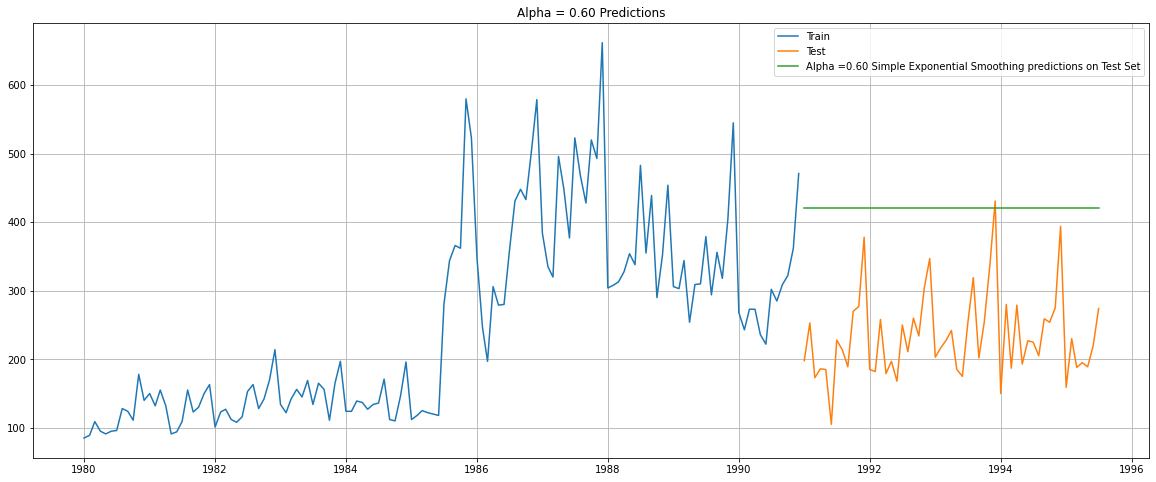

In [162]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.60 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.60 Predictions');

In [163]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [164]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values))

SES RMSE: 196.40495088614486
SES RMSE (calculated using statsmodels): 196.40495088614486


In [165]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)]},index=['Alpha=0.60,SES'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf


,Test RMSE
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570
"Alpha=0.60,SES",196.404951


**double exponential smoothing**

In [166]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5957893592032527, 'smoothing_trend': 0.00027755145973862305, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 82.94928943036535, 'initial_trend': 2.53794462416892, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [167]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    423.037852
1991-02-01    425.576513
1991-03-01    428.115175
1991-04-01    430.653837
1991-05-01    433.192498
1991-06-01    435.731160
1991-07-01    438.269821
1991-08-01    440.808483
1991-09-01    443.347145
1991-10-01    445.885806
1991-11-01    448.424468
1991-12-01    450.963129
1992-01-01    453.501791
1992-02-01    456.040453
1992-03-01    458.579114
1992-04-01    461.117776
1992-05-01    463.656437
1992-06-01    466.195099
1992-07-01    468.733761
1992-08-01    471.272422
1992-09-01    473.811084
1992-10-01    476.349745
1992-11-01    478.888407
1992-12-01    481.427069
1993-01-01    483.965730
1993-02-01    486.504392
1993-03-01    489.043053
1993-04-01    491.581715
1993-05-01    494.120376
1993-06-01    496.659038
1993-07-01    499.197700
1993-08-01    501.736361
1993-09-01    504.275023
1993-10-01    506.813684
1993-11-01    509.352346
1993-12-01    511.891008
1994-01-01    514.429669
1994-02-01    516.968331
1994-03-01    519.506992
1994-04-01    522.045654


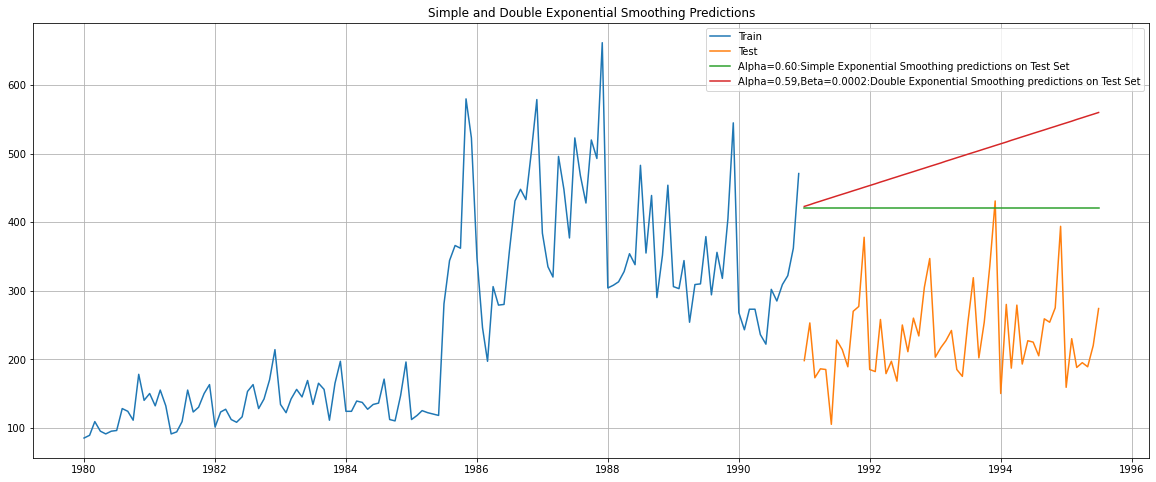

In [168]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.60:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.59,Beta=0.0002:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [169]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 266.6595130089617


In [170]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.59,Beta=0.0002:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570
"Alpha=0.60,SES",196.404951
"Alpha=0.59,Beta=0.0002:DES",266.659513


**Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors**

In [171]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5707142857142857, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.29372180451127816, 'damping_trend': nan, 'initial_level': 116.47499999999991, 'initial_trend': 1.6939393939394, 'initial_seasons': array([-11.20138889, -14.06597222,   1.11111111,  -5.25347222,
       -21.42013889, -11.18055556, -10.83680556,  18.14236111,
        -2.53472222, -12.53472222,  28.90277778,  40.87152778]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [172]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01    219.083658
1991-02-01    213.816321
1991-03-01    246.658224
1991-04-01    267.260236
1991-05-01    287.719744
1991-06-01    286.532259
1991-07-01    380.493545
1991-08-01    339.555860
1991-09-01    372.342545
1991-10-01    344.012031
1991-11-01    392.660570
1991-12-01    483.619562
1992-01-01    239.374793
1992-02-01    234.107456
1992-03-01    266.949358
1992-04-01    287.551371
1992-05-01    308.010879
1992-06-01    306.823393
1992-07-01    400.784679
1992-08-01    359.846995
1992-09-01    392.633680
1992-10-01    364.303165
1992-11-01    412.951705
1992-12-01    503.910697
1993-01-01    259.665928
1993-02-01    254.398590
1993-03-01    287.240493
1993-04-01    307.842506
1993-05-01    328.302014
1993-06-01    327.114528
1993-07-01    421.075814
1993-08-01    380.138129
1993-09-01    412.924815
1993-10-01    384.594300
1993-11-01    433.242840
1993-12-01    524.201832
1994-01-01    279.957063
1994-02-01    274.689725
1994-03-01    307.531628
1994-04-01    328.133640


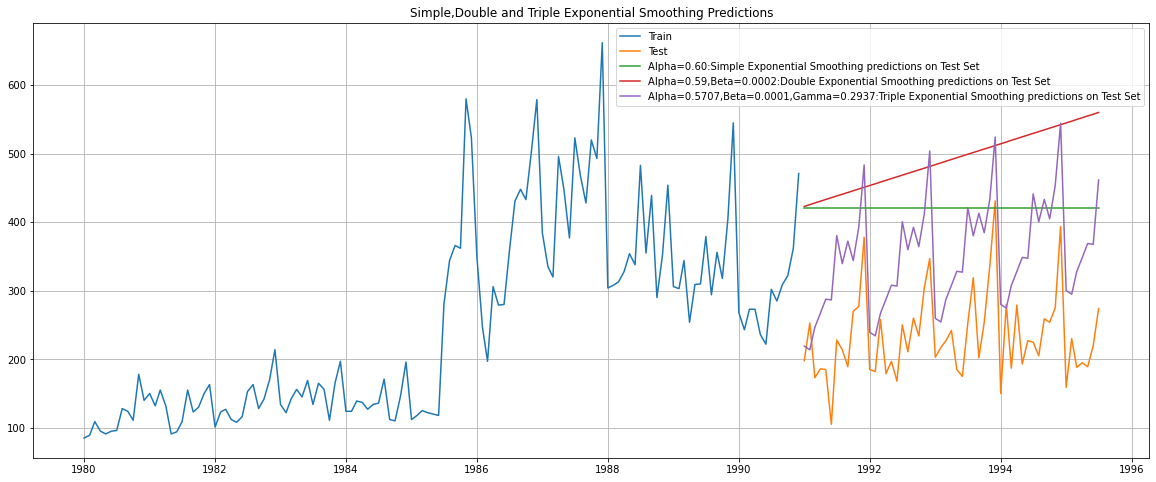

In [173]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.60:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.59,Beta=0.0002:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.5707,Beta=0.0001,Gamma=0.2937:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [174]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 128.9925259231235


In [175]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.5707,Beta==0.0001,Gamma=0.2937:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570
"Alpha=0.60,SES",196.404951
"Alpha=0.59,Beta=0.0002:DES",266.659513
"Alpha=0.5707,Beta==0.0001,Gamma=0.2937:TES",128.992526


**Holt-Winters - ETS(A, A, M) - Holt Winter's linear method**

In [176]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5708992368955211, 'smoothing_trend': 0.0001717659173061249, 'smoothing_seasonal': 0.20316679557808834, 'damping_trend': nan, 'initial_level': 116.41433303805363, 'initial_trend': 0.25989353377563174, 'initial_seasons': array([1.05765346, 1.01249426, 1.24140871, 1.398985  , 1.32217128,
       1.08386278, 1.17959888, 1.49948831, 1.71766325, 1.47103317,
       1.75411719, 1.91052565]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [177]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-01    261.485579
1991-02-01    243.399646
1991-03-01    257.709951
1991-04-01    271.138700
1991-05-01    268.503516
1991-06-01    258.284102
1991-07-01    341.615423
1991-08-01    317.838180
1991-09-01    342.572847
1991-10-01    317.346550
1991-11-01    379.101356
1991-12-01    470.295369
1992-01-01    265.401200
1992-02-01    247.039896
1992-03-01    261.559426
1992-04-01    275.183729
1992-05-01    272.504257
1992-06-01    262.127800
1992-07-01    346.692933
1992-08-01    322.556440
1992-09-01    347.652005
1992-10-01    322.045885
1992-11-01    384.708250
1992-12-01    477.242455
1993-01-01    269.316821
1993-02-01    250.680146
1993-03-01    265.408901
1993-04-01    279.228758
1993-05-01    276.504999
1993-06-01    265.971498
1993-07-01    351.770443
1993-08-01    327.274699
1993-09-01    352.731164
1993-10-01    326.745219
1993-11-01    390.315143
1993-12-01    484.189542
1994-01-01    273.232442
1994-02-01    254.320396
1994-03-01    269.258377
1994-04-01    283.273786


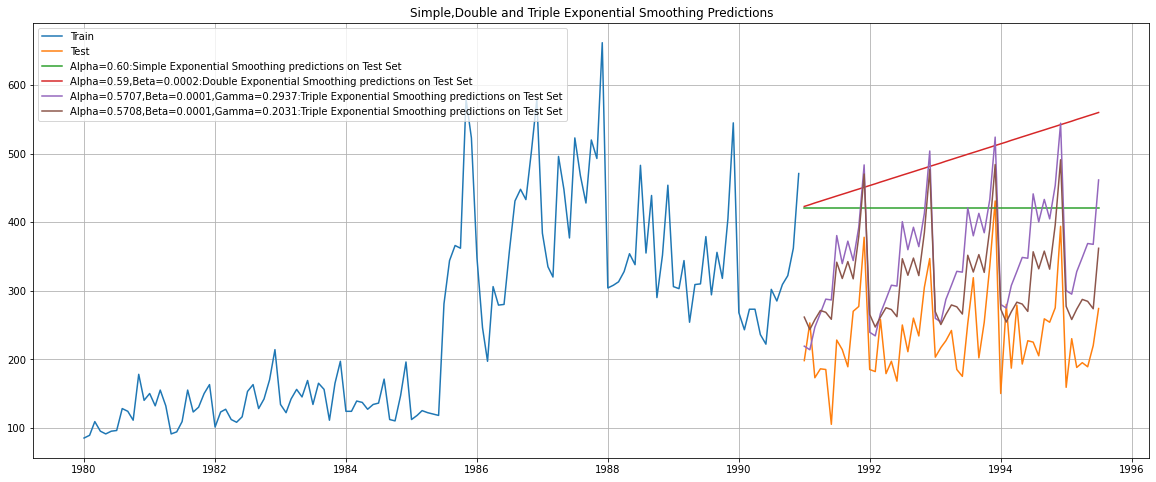

In [178]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.60:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.59,Beta=0.0002:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.5707,Beta=0.0001,Gamma=0.2937:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.5708,Beta=0.0001,Gamma=0.2031:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [179]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 89.14611639896367


In [180]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.5708,Beta=0.0001,Gamma=0.2031:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570
"Alpha=0.60,SES",196.404951
"Alpha=0.59,Beta=0.0002:DES",266.659513
"Alpha=0.5707,Beta==0.0001,Gamma=0.2937:TES",128.992526
"Alpha=0.5708,Beta=0.0001,Gamma=0.2031:TES",89.146116


**Check for stationarity of the whole Time Series data.**

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

𝐻0
  : The Time Series has a unit root and is thus non-stationary.
𝐻1
  : The Time Series does not have a unit root and is thus stationary.
We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the  𝛼
  value.

In [181]:
from statsmodels.tsa.stattools import adfuller

In [182]:
dftest = adfuller(df_2,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.577
DF test p-value is 0.8014186234536544
Number of lags used 13


Let us take one level of differencing to see whether the series becomes stationary

In [183]:
dftest = adfuller(df_2.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -3.532
DF test p-value is 0.03611703400136296
Number of lags used 12


**Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.**

In [184]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

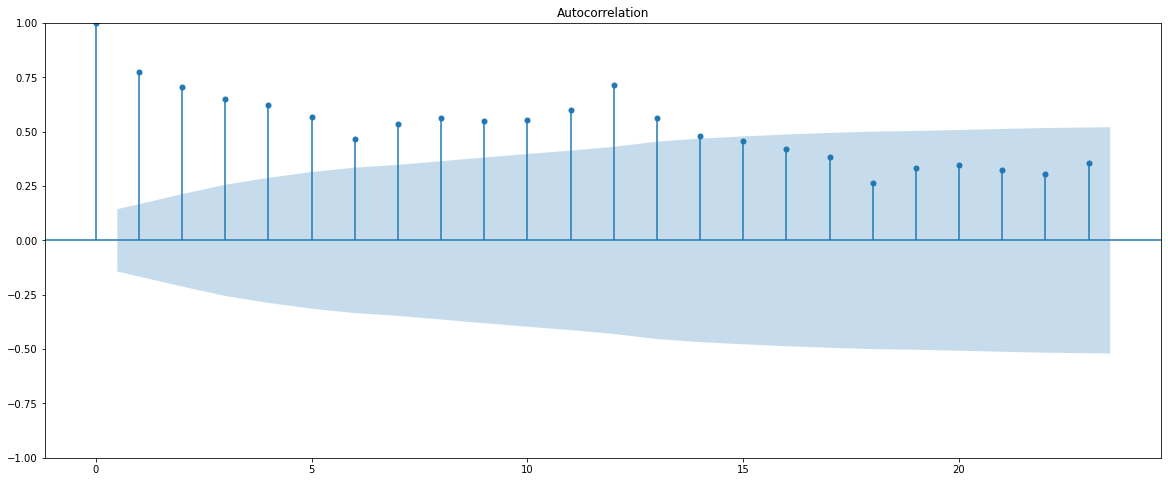

In [185]:
plot_acf(df_2,alpha=0.05);

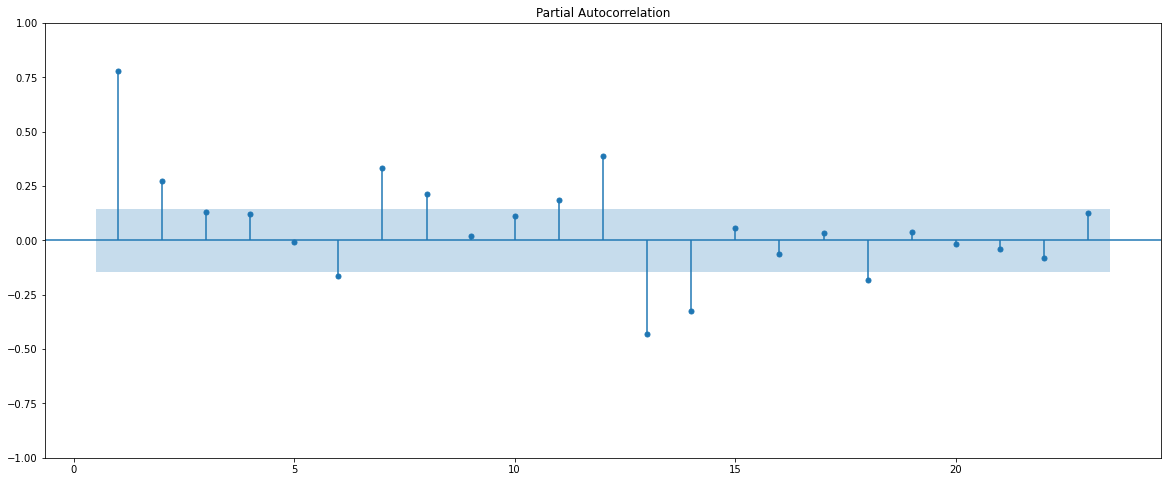

In [186]:
plot_pacf(df_2,zero=False,alpha=0.05);

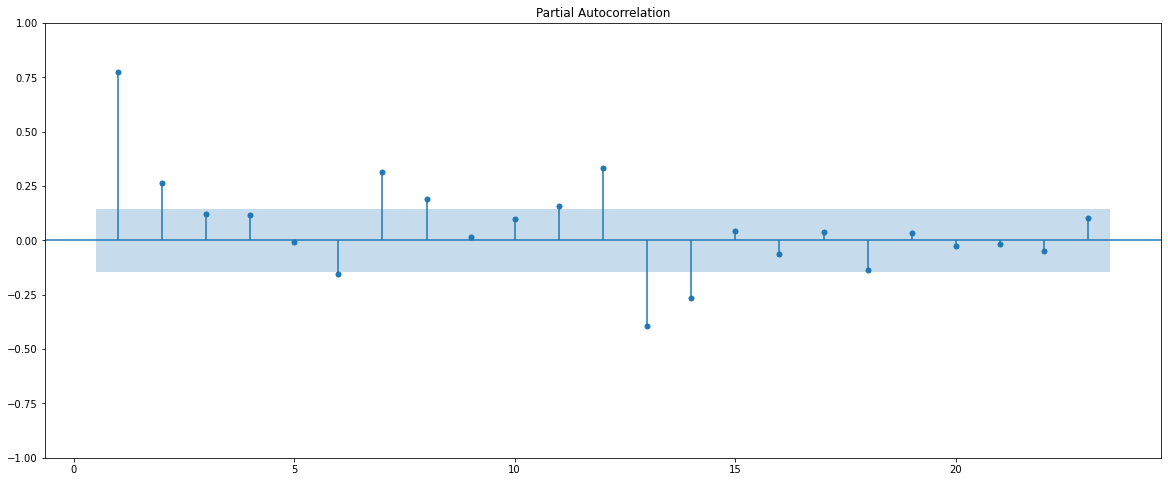

In [187]:
plot_pacf(df_2,zero=False,alpha=0.05,method='ywmle');

**Split the data into train and test and plot the training and test data.**

In [188]:
train = df_2[df_2.index<'1991'] 
test = df_2[df_2.index>='1991']

In [189]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [190]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Shoe_Sales
Time_Stamp,
1980-01-31,85
1980-02-29,89
1980-03-31,109
1980-04-30,95
1980-05-31,91


Last few rows of Training Data


,Shoe_Sales
Time_Stamp,
1990-08-31,285
1990-09-30,309
1990-10-31,322
1990-11-30,362
1990-12-31,471


First few rows of Test Data


,Shoe_Sales
Time_Stamp,
1991-01-31,198
1991-02-28,253
1991-03-31,173
1991-04-30,186
1991-05-31,185


Last few rows of Test Data


,Shoe_Sales
Time_Stamp,
1995-03-31,188
1995-04-30,195
1995-05-31,189
1995-06-30,220
1995-07-31,274


In [191]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


**Check for stationarity of the Training Data Time Series.**

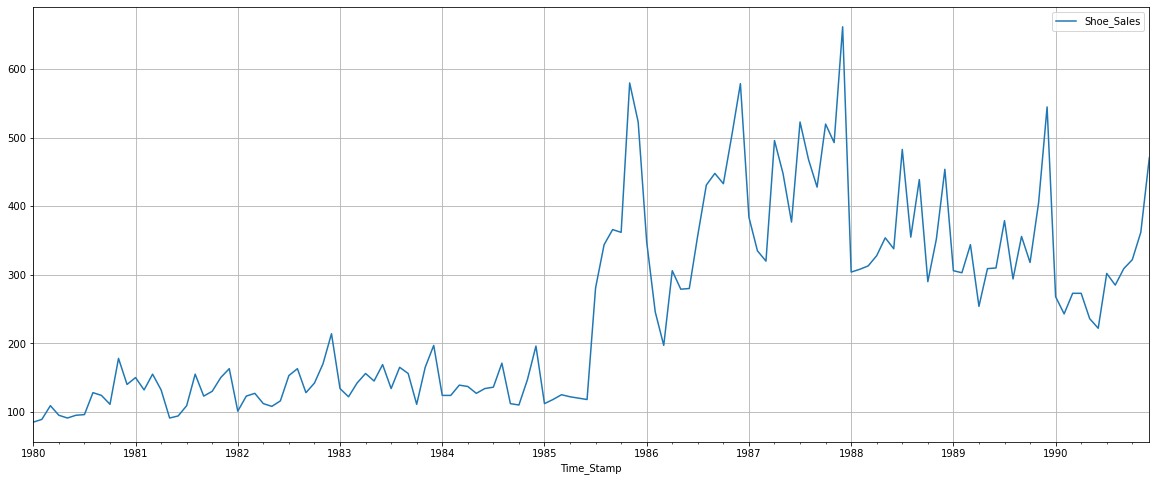

In [192]:
train.plot(grid=True);

In [193]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.749
DF test p-value is 0.7287654522797302
Number of lags used 13


**The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.**

In [194]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -3.181
DF test p-value is 0.08822589255919766
Number of lags used 13


lets take second level differencing

In [195]:
dftest = adfuller(train.diff().diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.564
DF test p-value is 1.336228351659441e-07
Number of lags used 13


**Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).**

In [196]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [197]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [198]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Shoe_Sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1508.2837722095956
ARIMA(0, 1, 1) - AIC:1497.0503224187926
ARIMA(0, 1, 2) - AIC:1494.9646053663441
ARIMA(0, 1, 3) - AIC:1495.1484738738836
ARIMA(1, 1, 0) - AIC:1501.64312420119
ARIMA(1, 1, 1) - AIC:1492.487186507898
ARIMA(1, 1, 2) - AIC:1494.4238594575386
ARIMA(1, 1, 3) - AIC:1496.385878255841
ARIMA(2, 1, 0) - AIC:1498.9504830258975
ARIMA(2, 1, 1) - AIC:1494.4314983035438
ARIMA(2, 1, 2) - AIC:1496.4107391784296
ARIMA(2, 1, 3) - AIC:1480.79752085972
ARIMA(3, 1, 0) - AIC:1498.930309422774
ARIMA(3, 1, 1) - AIC:1496.3468641048494
ARIMA(3, 1, 2) - AIC:1495.6558545480107
ARIMA(3, 1, 3) - AIC:1482.4131503833655


In [199]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
11,"(2, 1, 3)",1480.797521
15,"(3, 1, 3)",1482.41315
5,"(1, 1, 1)",1492.487187
6,"(1, 1, 2)",1494.423859
9,"(2, 1, 1)",1494.431498


In [200]:
auto_ARIMA = ARIMA(train, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -734.399
Date:                Thu, 01 Jun 2023   AIC                           1480.798
Time:                        12:40:44   BIC                           1498.049
Sample:                    01-31-1980   HQIC                          1487.807
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0155      0.029      0.540      0.589      -0.041       0.072
ar.L2         -0.9975      0.015    -66.425      0.000      -1.027      -0.968
ma.L1         -0.3322      0.090     -3.696      0.0

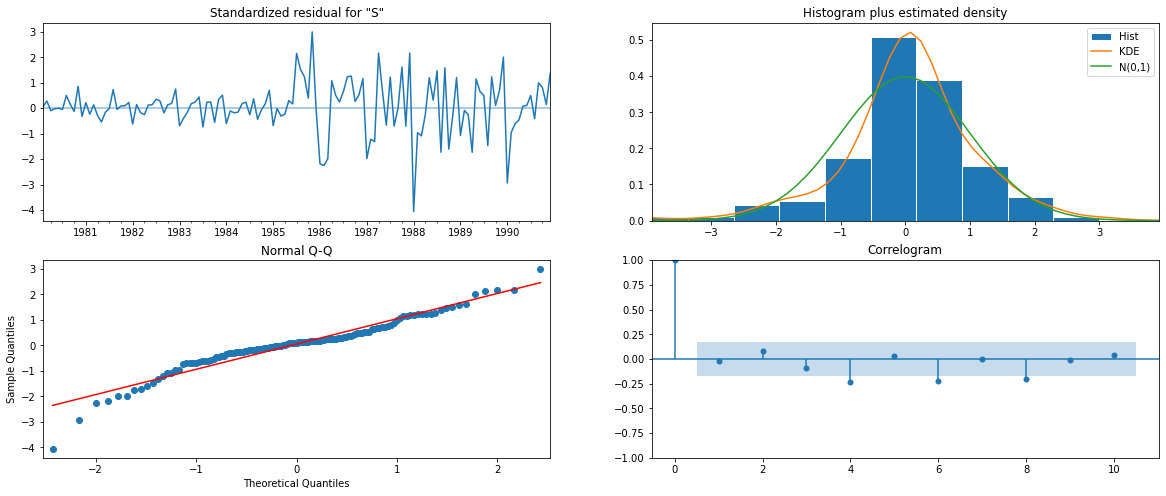

In [201]:
results_auto_ARIMA.plot_diagnostics();

**Predict on the Test Set using this model and evaluate the model**

In [202]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [203]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [204]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Shoe_Sales'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 184.9731983953375 
MAPE: 85.87498660342914


In [205]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(2,1,3)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570
"Alpha=0.60,SES",196.404951
"Alpha=0.59,Beta=0.0002:DES",266.659513
"Alpha=0.5707,Beta==0.0001,Gamma=0.2937:TES",128.992526
"Alpha=0.5708,Beta=0.0001,Gamma=0.2031:TES",89.146116
"ARIMA(2,1,3)",184.973198


**Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.**

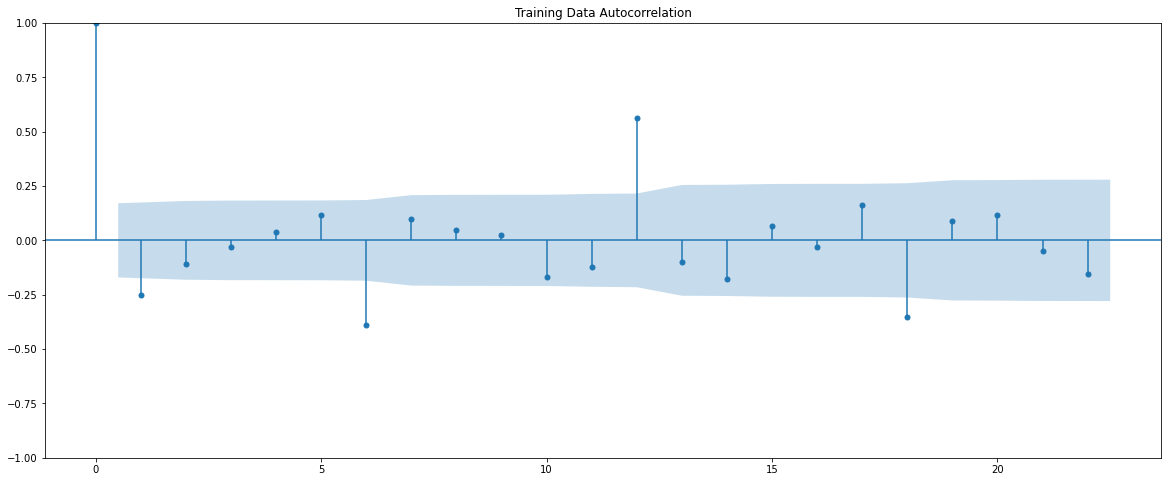

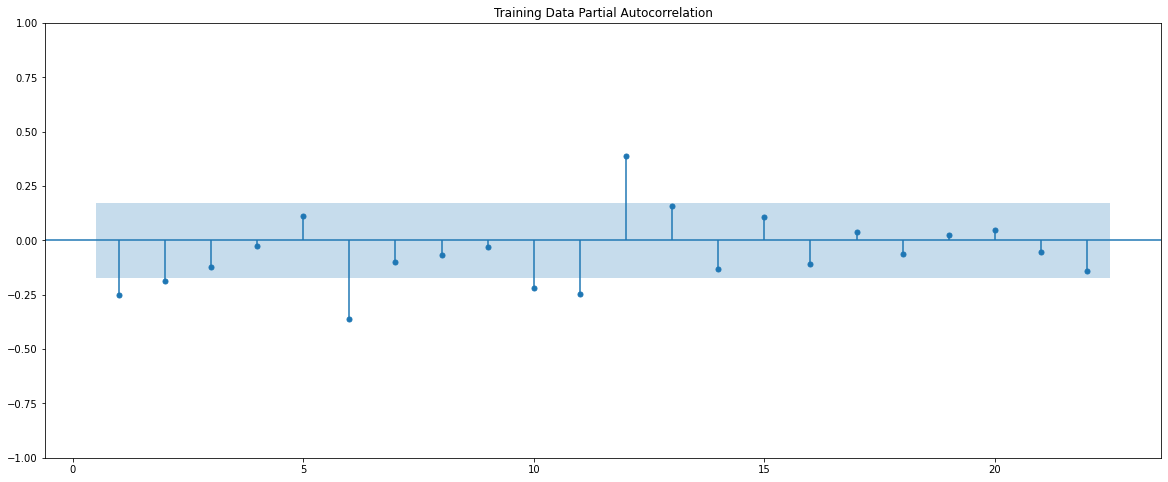

In [206]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 2.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 1.
By looking at the above plots, we will take the value of p and q to be 2 and 1 respectively.

In [207]:
manual_ARIMA = ARIMA(train['Shoe_Sales'], order=(2,1,1),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -743.216
Date:                Thu, 01 Jun 2023   AIC                           1494.431
Time:                        12:40:46   BIC                           1505.932
Sample:                    01-31-1980   HQIC                          1499.105
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4698      0.112      4.212      0.000       0.251       0.688
ar.L2          0.0234      0.111      0.211      0.833      -0.194       0.241
ma.L1         -0.8430      0.089     -9.497      0.0

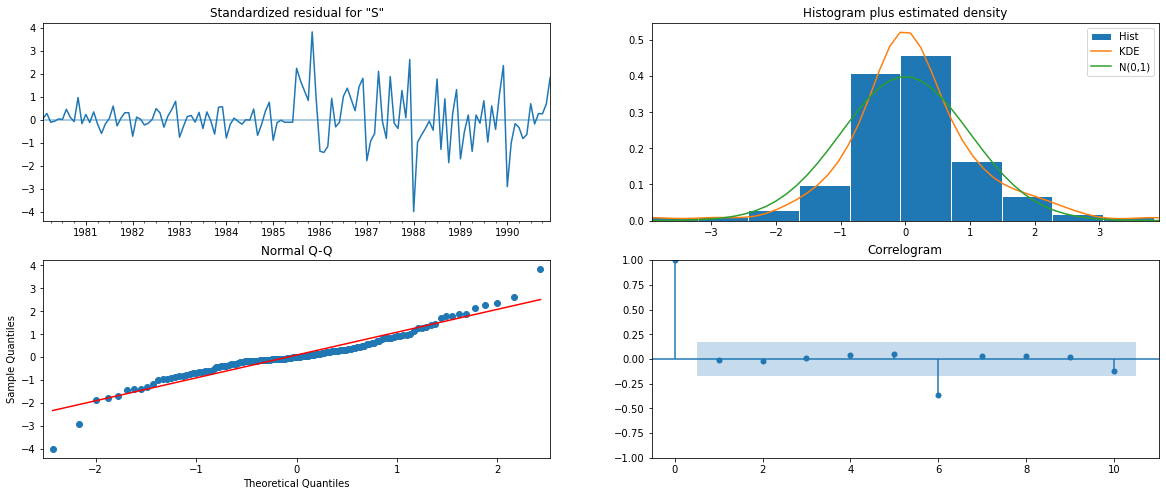

In [208]:
results_manual_ARIMA.plot_diagnostics();

**Predict on the Test Set using this model and evaluate the model.**

In [209]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [210]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Shoe_Sales'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 143.2535850618911 
MAPE: 66.47287650574025


In [211]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(2,1,1)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570
"Alpha=0.60,SES",196.404951
"Alpha=0.59,Beta=0.0002:DES",266.659513
"Alpha=0.5707,Beta==0.0001,Gamma=0.2937:TES",128.992526
"Alpha=0.5708,Beta=0.0001,Gamma=0.2031:TES",89.146116
"ARIMA(2,1,3)",184.973198
"ARIMA(2,1,1)",143.253585


build the ACF and PACF model on the whole data

In [212]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

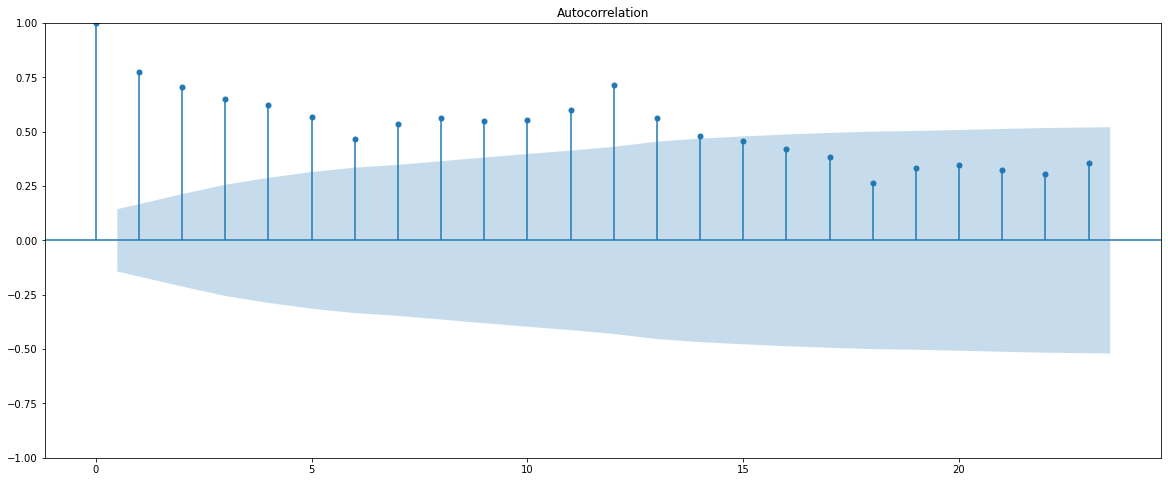

In [213]:
plot_acf(df_2,alpha=0.05);

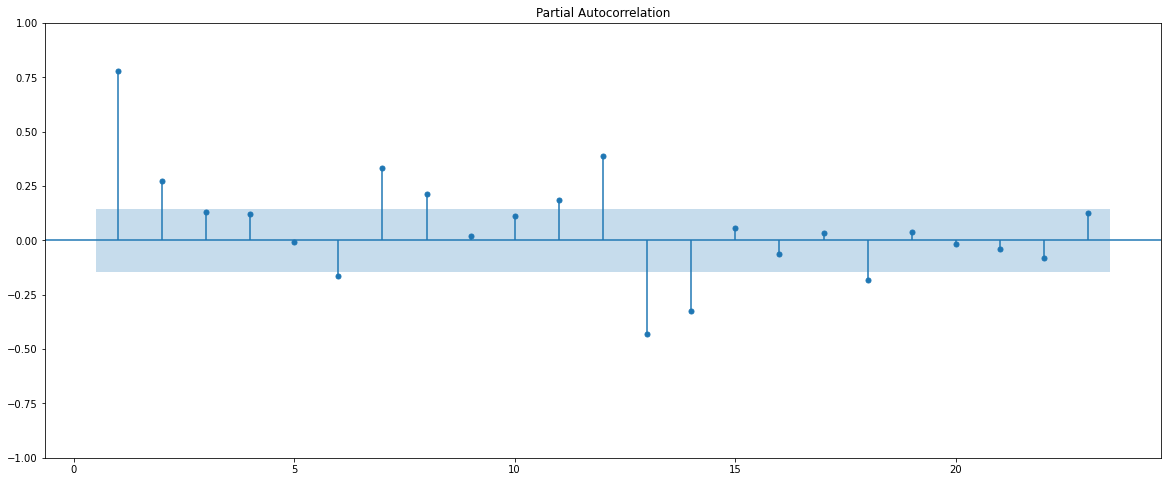

In [214]:
plot_pacf(df_2,zero=False,alpha=0.05);

**Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)**

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

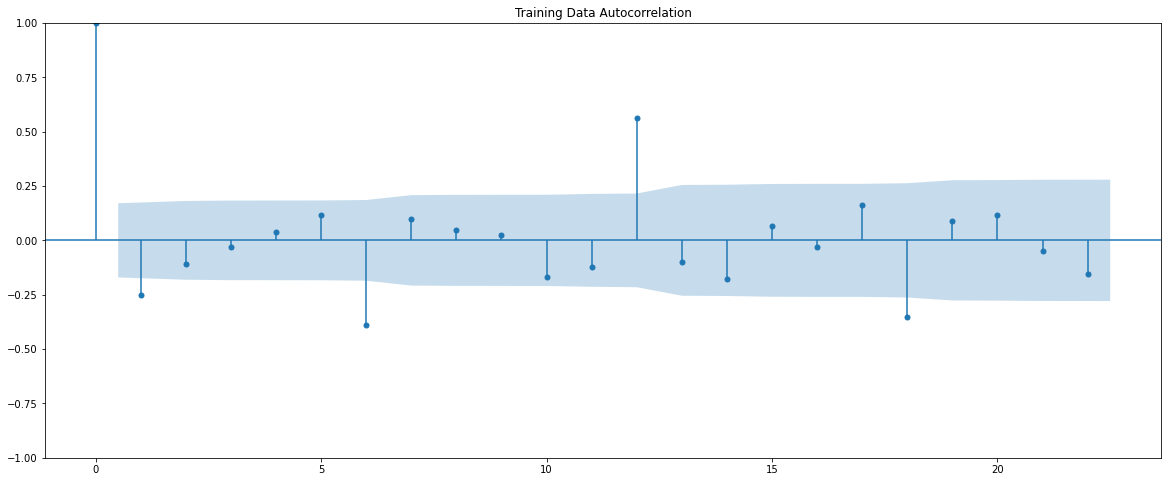

In [215]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

there is a seasonality of 6

In [216]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [217]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [218]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1497.7788474019549
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1426.3361157221489
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1334.5305386143484
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1272.782374814659
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1426.0492095804898
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1385.57115635478
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1319.6061076038218
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1254.327361170257
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1323.6330116787822
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1322.9358084091896
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1312.671807677995
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1253.1349531753267
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1262.9486596454287
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1263.35730990562
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1264.204527637595
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1254.8424877306018
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1476.016777738261
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1405.2509947832393
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:13

In [219]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
59,"(0, 1, 3)","(2, 0, 3, 6)",1208.149006
123,"(1, 1, 3)","(2, 0, 3, 6)",1209.791558
63,"(0, 1, 3)","(3, 0, 3, 6)",1210.147616
55,"(0, 1, 3)","(1, 0, 3, 6)",1211.609239
187,"(2, 1, 3)","(2, 0, 3, 6)",1211.763032


In [220]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'],
                                order=(0, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                        Shoe_Sales   No. Observations:                  132
Model:             SARIMAX(0, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -595.075
Date:                           Thu, 01 Jun 2023   AIC                           1208.149
Time:                                   12:44:32   BIC                           1232.371
Sample:                               01-31-1980   HQIC                          1217.972
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4238      0.088     -4.804      0.000      -0.597      -0.251
ma.L2          0.0896      0.096      0.933

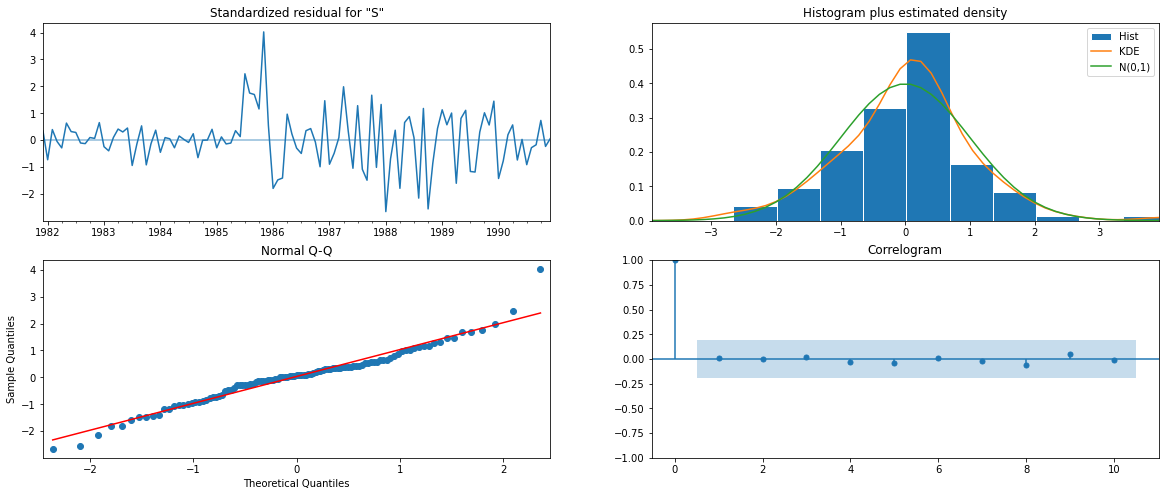

In [221]:
results_auto_SARIMA.plot_diagnostics();

**Predict on the Test Set using this model and evaluate the model.**

In [222]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [223]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Shoe_Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,230.483755,55.712352,121.289552,339.677959
1991-02-28,223.748853,64.298186,97.726724,349.770982
1991-03-31,232.112390,74.229148,86.625934,377.598847
1991-04-30,259.566177,77.861895,106.959667,412.172686
1991-05-31,219.255197,81.335494,59.840559,378.669835


In [224]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Shoe_Sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 59.29462117573209 
MAPE: 23.02214769233266


In [225]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse},index=['SARIMA(0,1,3)(2,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570
"Alpha=0.60,SES",196.404951
"Alpha=0.59,Beta=0.0002:DES",266.659513
"Alpha=0.5707,Beta==0.0001,Gamma=0.2937:TES",128.992526
"Alpha=0.5708,Beta=0.0001,Gamma=0.2031:TES",89.146116
"ARIMA(2,1,3)",184.973198
"ARIMA(2,1,1)",143.253585
"SARIMA(0,1,3)(2,0,3,6)",59.294621


**Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6**

Let us look at the ACF and the PACF plots once more

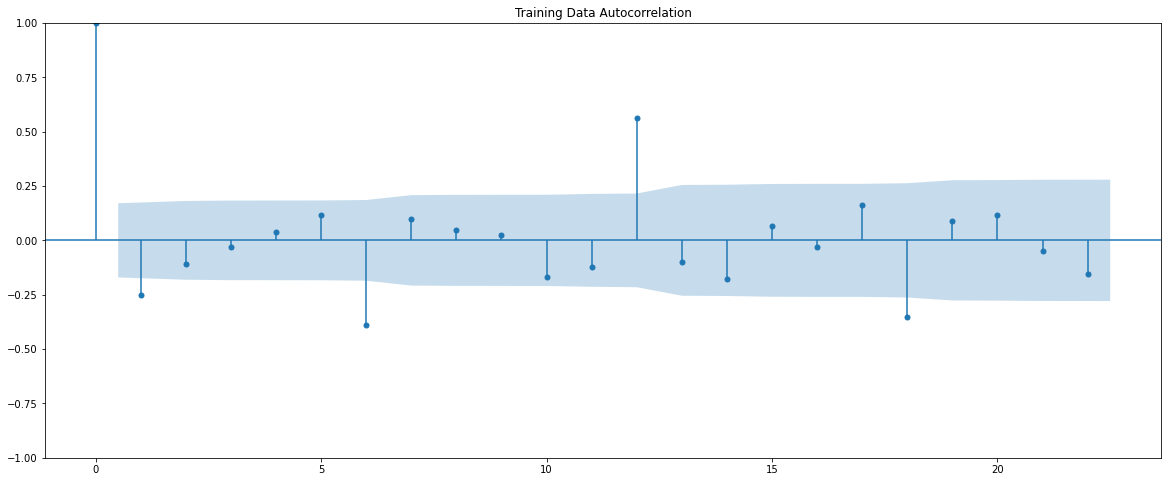

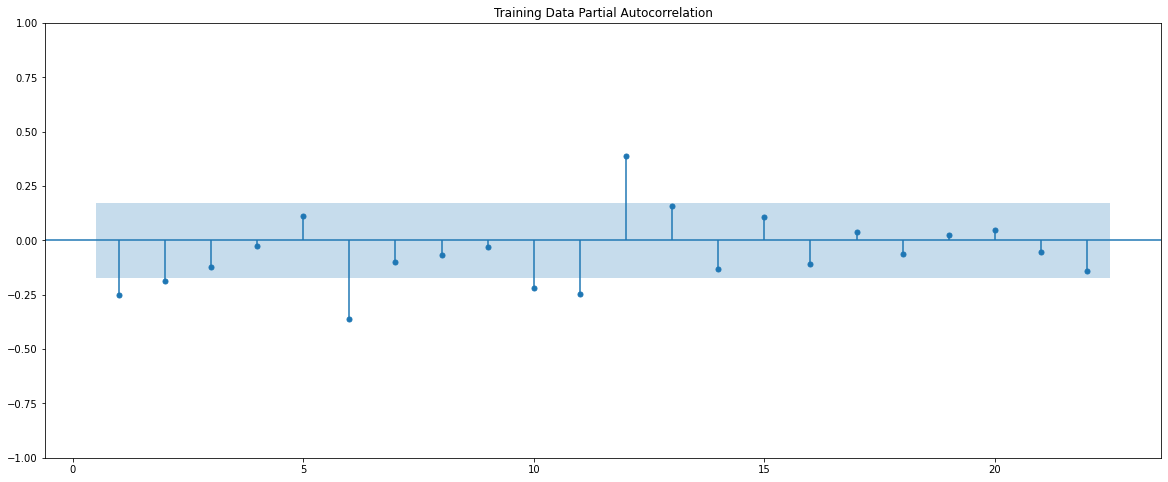

In [226]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 3 or its multiple e.g. 6. We are taking the p value to be 2 and the q value also to be 1 as the parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 3.
The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 3.
Remember to check the ACF and the PACF plots only at multiples of 3 (since 3 is the seasonal period).

In [227]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'],
                                order=(2,1,1),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                Shoe_Sales   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(3, 0, [1, 2, 3], 6)   Log Likelihood                -606.353
Date:                                   Thu, 01 Jun 2023   AIC                           1232.705
Time:                                           12:44:35   BIC                           1259.801
Sample:                                       01-31-1980   HQIC                          1243.697
                                            - 12-31-1990                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4701      0.139      3.394      0.001    

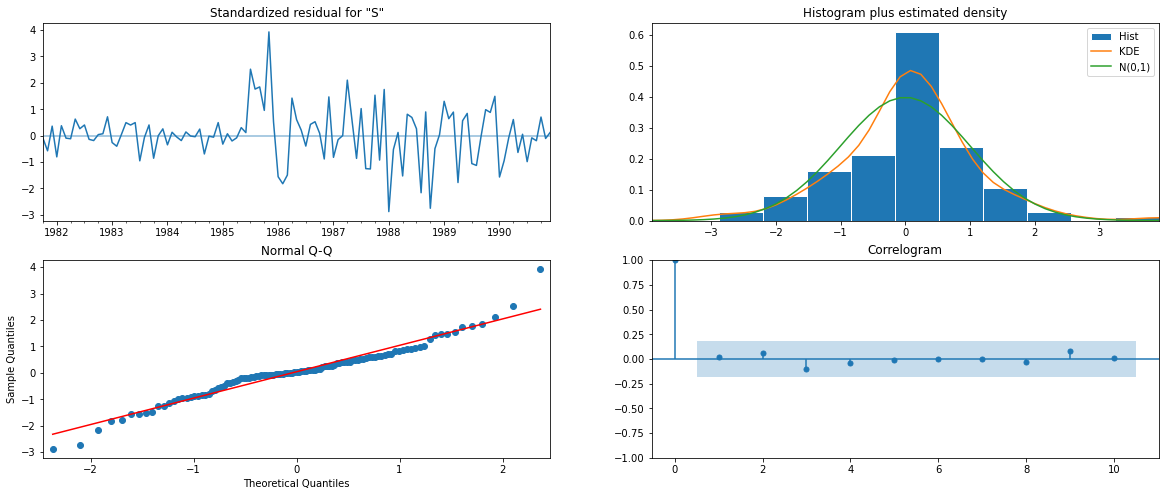

In [228]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

**Predict on the Test Set using this model and evaluate the model.¶**

In [229]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [230]:
rmse = mean_squared_error(test['Shoe_Sales'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Shoe_Sales'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 66.15819851446423 
MAPE: 27.33493398343442


In [231]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse],}
                           ,index=['SARIMA(2,1,1)(3,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
RegressionOnTime,266.276472
NaiveModel,245.121306
SimpleAverageModel,63.984570
"Alpha=0.60,SES",196.404951
"Alpha=0.59,Beta=0.0002:DES",266.659513
"Alpha=0.5707,Beta==0.0001,Gamma=0.2937:TES",128.992526
"Alpha=0.5708,Beta=0.0001,Gamma=0.2031:TES",89.146116
"ARIMA(2,1,3)",184.973198
"ARIMA(2,1,1)",143.253585
"SARIMA(0,1,3)(2,0,3,6)",59.294621


In [232]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"SARIMA(0,1,3)(2,0,3,6)",59.294621
SimpleAverageModel,63.984570
"SARIMA(2,1,1)(3,0,3,6)",66.158199
"Alpha=0.5708,Beta=0.0001,Gamma=0.2031:TES",89.146116
"Alpha=0.5707,Beta==0.0001,Gamma=0.2937:TES",128.992526
"ARIMA(2,1,1)",143.253585
"ARIMA(2,1,3)",184.973198
"Alpha=0.60,SES",196.404951
NaiveModel,245.121306
RegressionOnTime,266.276472


**Building the most optimum model on the Full Data**

In [233]:
full_data_model = sm.tsa.statespace.SARIMAX(df_2['Shoe_Sales'],
                                order=(0,1,3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                        Shoe_Sales   No. Observations:                  187
Model:             SARIMAX(0, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -886.578
Date:                           Thu, 01 Jun 2023   AIC                           1791.156
Time:                                   12:44:39   BIC                           1819.055
Sample:                               01-31-1980   HQIC                          1802.482
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5122      0.072     -7.152      0.000      -0.653      -0.372
ma.L2          0.1448      0.080      1.812

**Evaluate the model on the whole data and predict 12 months into the future (till the end of next year).¶**

In [234]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [235]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date

Shoe_Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,240.430682,52.102514,138.311631,342.549734
1995-09-30,254.638770,57.970961,141.017775,368.259766
1995-10-31,251.910380,66.685496,121.209209,382.611551
1995-11-30,315.505844,70.975950,176.395538,454.616150
1995-12-31,394.025176,75.021435,246.985866,541.064486
1996-01-31,196.003357,78.859707,41.441172,350.565542
1996-02-29,238.869152,80.680668,80.737948,397.000356
1996-03-31,212.331937,83.308908,49.049478,375.614395
1996-04-30,229.837195,85.613809,62.037212,397.637178
1996-05-31,216.242952,88.123652,43.523769,388.962135


In [236]:
rmse = mean_squared_error(df_2['Shoe_Sales'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 51.01241627428876


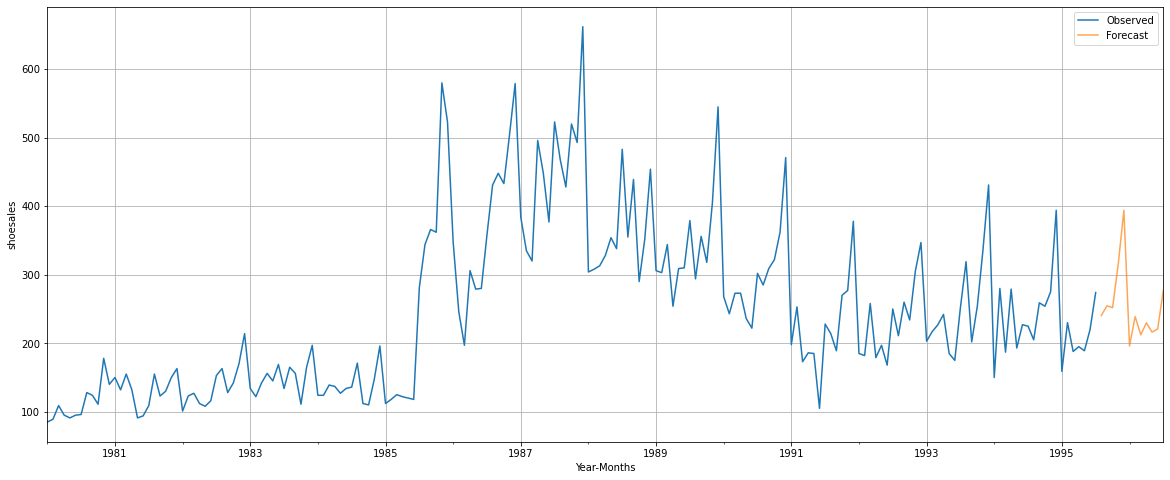

In [291]:
axis = df_2['Shoe_Sales'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('shoesales')
plt.legend(loc='best')
plt.grid();

In [241]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

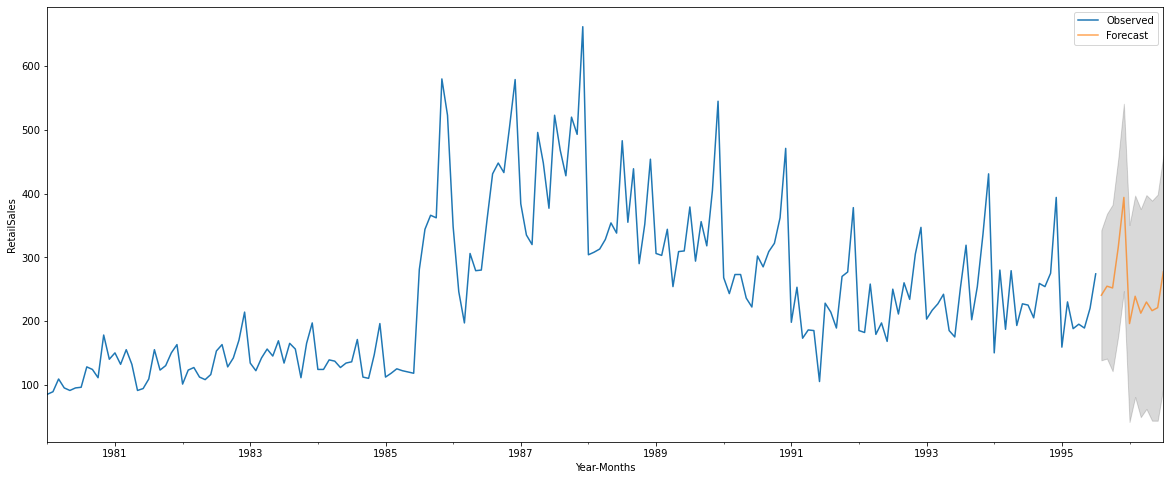

In [244]:
# plot the forecast along with the confidence band

axis = df_2['Shoe_Sales'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()